# ⌛LOADING PACKAGES AND THE DATA

In [1]:
import scanpy as sc
import anndata as ad
import decoupler as dc
import pandas as pd
import seaborn as sns

In [2]:
adata = sc.read_h5ad('bone_marrow.h5ad')

# QUALITY CONTROL & PRE-PROCESSING

In [3]:
# to make unique
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [4]:
adata.var

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding
...,...,...,...,...,...,...,...
ENSG00000176946,559,False,THAP4,NCBITaxon:9606,gene,785,protein_coding
ENSG00000150456,289,False,EEF1AKMT1,NCBITaxon:9606,gene,875,protein_coding
ENSG00000284934,11,False,ENSG00000284934,NCBITaxon:9606,gene,560,protein_coding
ENSG00000261842,8,False,ENSG00000261842,NCBITaxon:9606,gene,2216,lncRNA


In [9]:
adata.var['MT'] = adata.var['feature_name'].str.startswith("MT-")
adata.var['RIBO'] = adata.var['feature_name'].str.startswith(("RPS", "RPL"))
adata.var['HB'] = adata.var['feature_name'].str.startswith("^HB[^(P)]")

In [10]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)

In [11]:
adata.var

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000176946,559,False,THAP4,NCBITaxon:9606,gene,785,protein_coding,False,False,False,530,0.295346,0.258778,96.414801,4366.107422,8.381856
ENSG00000150456,289,False,EEF1AKMT1,NCBITaxon:9606,gene,875,protein_coding,False,False,False,270,0.146048,0.136319,98.173578,2159.022949,7.677874
ENSG00000284934,11,False,ENSG00000284934,NCBITaxon:9606,gene,560,protein_coding,False,False,False,11,0.006156,0.006137,99.925590,91.000793,4.521797
ENSG00000261842,8,False,ENSG00000261842,NCBITaxon:9606,gene,2216,lncRNA,False,False,False,7,0.003998,0.003990,99.952648,59.098957,4.095993


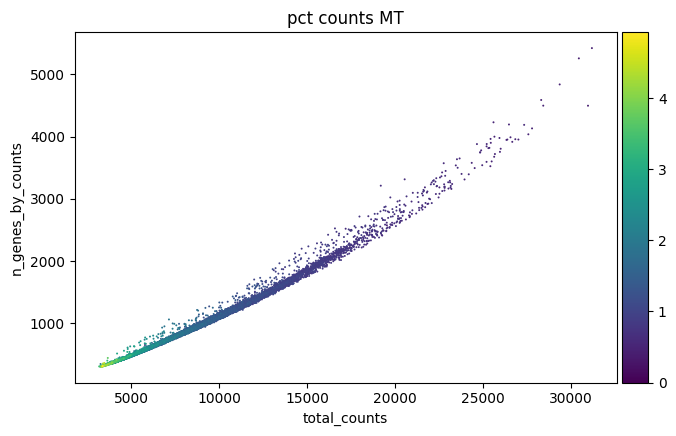

In [12]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

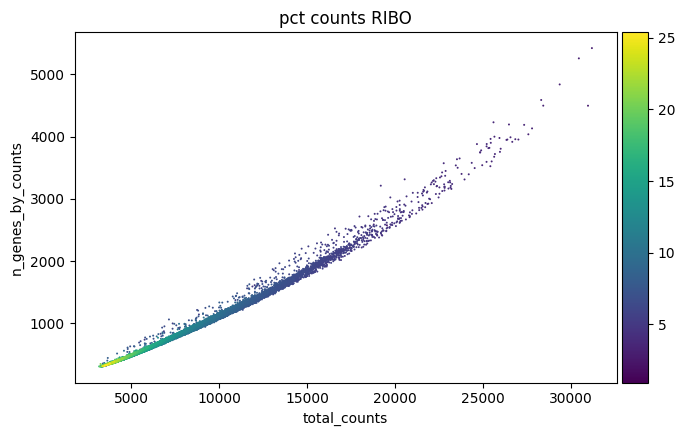

In [13]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

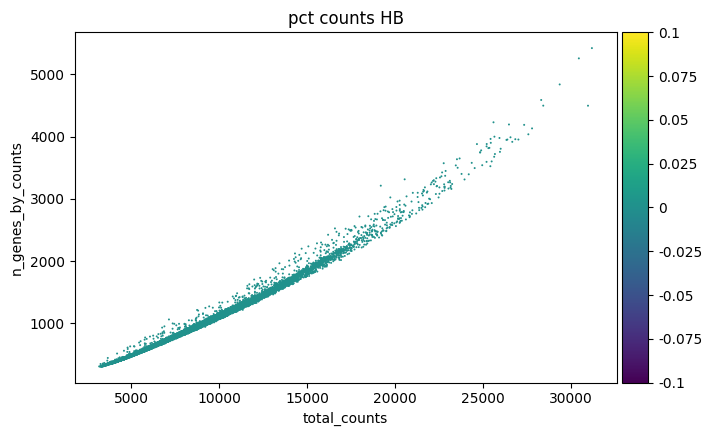

In [14]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_HB")

In [15]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [16]:
adata = adata[
    adata.obs['pct_counts_RIBO'] < 10,
    :
]

adata = adata[
    adata.obs['pct_counts_MT'] < 2,
    :
]

In [17]:
sc.pp.scrublet(adata)

/home/sepanjibu/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_scrublet/__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


# NORMALISATION

In [18]:
adata.layers["counts"] = adata.X.copy()

In [19]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [20]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

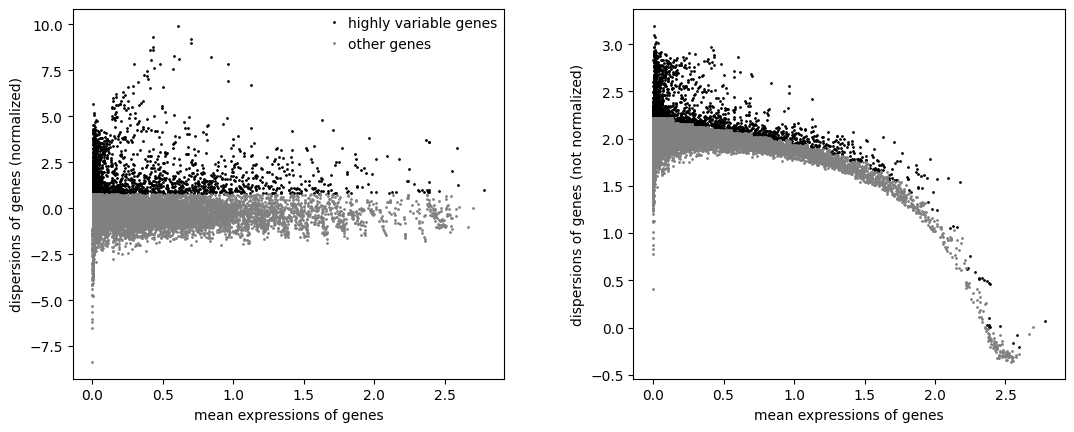

In [21]:
sc.pl.highly_variable_genes(adata)

# 🔍 Dimensionality Reduction (PCA)

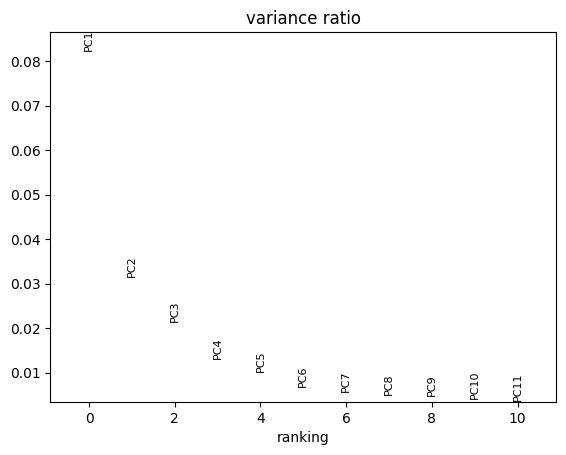

In [22]:
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=10, log=False)

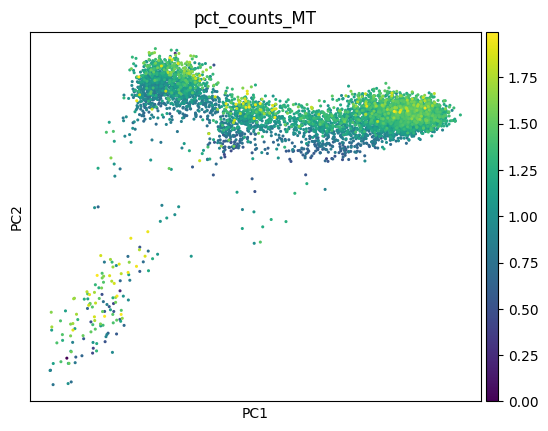

In [23]:
sc.pl.pca(
    adata,
    color=["pct_counts_MT"]
)

# 🏠 Nearest Neighbour

In [24]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

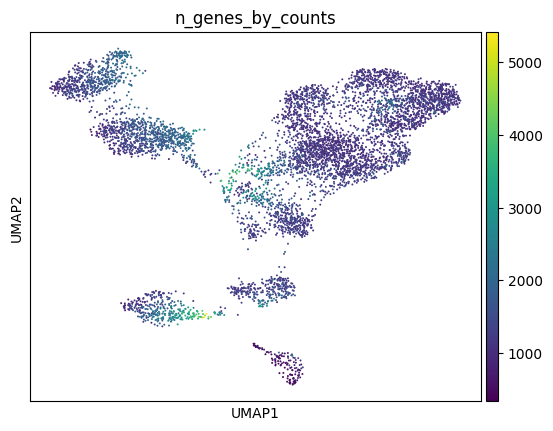

In [25]:
sc.pl.umap(
    adata,
    color=["n_genes_by_counts"],
    size=8,
)

In [26]:
adata.obs.columns

Index(['disease stage', 'treatment', 'timepoint', 'Dataset', 'sample',
       'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage',
       'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts',
       'percent_mito', 'tissue_original', 'tissue_ontology_term_id',
       'disease_ontology_term_id', 'donor_id',
       'development_stage_ontology_term_id', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id',
       'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease',
       'sex', 'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_MT',
       'log1p_total_counts_MT', 'pct_counts_MT', 't

# 🤼 CLUSTERING BY COMMUNITIES

Clustering by communities in single-cell RNA-seq is the process of grouping cells that show similar expression profiles — essentially, discovering putative cell types or states. Once PCA compresses your data into a manageable set of dimensions, clustering algorithms like Leiden operate on a graph-based representation of cell–cell relationships. Usually used for cell type detection


In [27]:
sc.tl.leiden(adata, flavor="igraph", n_iterations=-1)

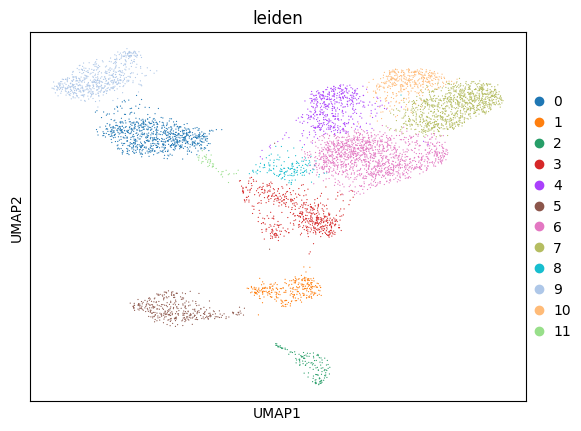

In [28]:
sc.pl.umap(
    adata,
    color=["leiden"],
    wspace=0.5,
    size=3,
    ncols = 1
)

# 🚀 FURTHER CLUSTERING

In [29]:
sc.tl.leiden(adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_02", resolution=0.02)
sc.tl.leiden(adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, flavor="igraph", n_iterations=2, key_added="leiden_res2", resolution=2)

In [30]:
adata.obs.columns
#adata.var.columns

Index(['disease stage', 'treatment', 'timepoint', 'Dataset', 'sample',
       'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage',
       'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts',
       'percent_mito', 'tissue_original', 'tissue_ontology_term_id',
       'disease_ontology_term_id', 'donor_id',
       'development_stage_ontology_term_id', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id',
       'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease',
       'sex', 'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_MT',
       'log1p_total_counts_MT', 'pct_counts_MT', 't

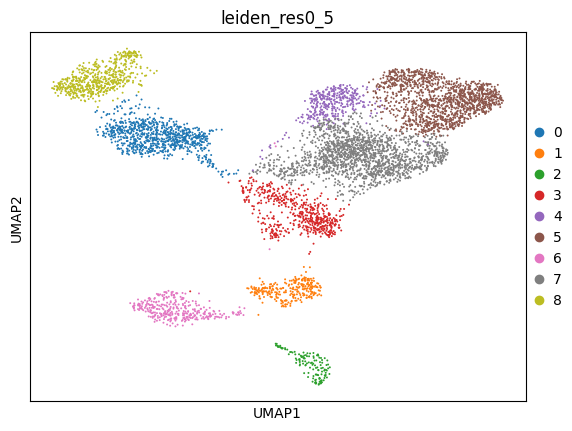

In [31]:
sc.pl.umap(
    adata,
    color=["leiden_res0_5"],
    wspace=0.5,
    size=8,
    ncols = 1
)

# 🦠 Cell Annotation
Cell annotation is the process of assigning biological meaning—like cell type or functional state—to each cluster found after Leiden clustering.

Traditionally, this relies on manual marker gene inspection: you identify top genes per cluster and match them to known markers. But tools like Decoupler enable a more systematic and data-driven approach.


Decoupler is a framework for gene set activity inference. Instead of labeling clusters by single markers, it estimates the activity of predefined pathways, transcription factors, or cell-type signatures from known databases (e.g., MSigDB, PROGENy, DoRothEA).

In practice:

- You provide your normalized expression matrix (adata).

- You load gene sets representing known biological programs or cell-type signatures.

- Decoupler calculates an activity score per cell or cluster using methods like weighted mean, ULM, or AUCell.

- You interpret those activities to annotate clusters automatically or semi-automatically.

### ‼️**IMPORTANT NOTE**‼️
Since the input has the ENSEMBL gene name as index, we need to change it to a form `decoupler` is familiar. Run the following codes.

In [32]:
#!wget -O result.txt 'http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query  virtualSchemaName = "default" formatter = "CSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" ><Dataset name = "hsapiens_gene_ensembl" interface = "default" ><Attribute name = "ensembl_gene_id" /><Attribute name = "external_gene_name" /></Dataset></Query>'
#this downloads the table of genes directly from ensemble

In [33]:
ensembl_var = pd.read_csv('result.txt', header = None)
ensembl_var.columns = ['ensembl_gene_id', 'gene_name']
ensembl_var.head(3)

,ensembl_gene_id,gene_name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV


In [34]:
# Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

# Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.head()

,source,target
,,
2,Bergmann glia,A2M
4,Mast cells,A4GALT
5,Embryonic stem cells,A7KBS4
8,Pinealocytes,AANAT
9,Astrocytes,AANAT


In [35]:
#correct target to ensemble
markers = markers.merge(ensembl_var, left_on="target", right_on="gene_name", how="left")
markers = markers.drop(columns=["target"])

# Remove duplicated entries
markers = markers[~markers.duplicated(["source", "ensembl_gene_id"])]

#Format because dc only accepts cell_type and genesymbol
markers = markers.rename(columns={"source": "source", "ensembl_gene_id": "target"})
markers = markers[["source", "target"]]
markers = markers.dropna()

markers.head()

,source,target
0,Bergmann glia,ENSG00000175899
1,Mast cells,ENSG00000128274
3,Pinealocytes,ENSG00000129673
4,Astrocytes,ENSG00000129673
5,Sertoli cells,ENSG00000205002


In [36]:
dc.mt.ulm(data=adata,
          net=markers,
          tmin = 3)

In [37]:
score = dc.pp.get_obsm(adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 6143 × 126
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', 'p

In [38]:
adata.obsm["score_ulm"].head()

,Acinar cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Astrocytes,B cells,B cells memory,B cells naive,...,T follicular helper cells,T helper cells,T memory cells,T regulatory cells,Tanycytes,Taste receptor cells,Thymocytes,Trophoblast cells,Tuft cells,Urothelial cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.868955,0.046169,-0.593775,-0.663882,0.832736,0.834118,0.274143,1.464693,-0.314608,0.224910,...,-0.514208,-0.424053,1.636884,-0.004926,0.535283,0.413876,-0.547760,-0.514208,3.109975,-0.785565
Guo-AAACCTGCACACCGCA-4,-1.074416,-0.714016,-0.554636,-0.620122,1.032716,-0.733783,1.566070,6.606575,6.750943,8.475245,...,-0.480314,1.541404,4.152870,-0.960897,-0.784472,0.553180,2.071626,1.703862,1.190254,-0.733783
Guo-AAACCTGCACGACTCG-6,-0.678621,-1.370384,-0.350324,-0.391686,0.893897,-0.463476,-0.085068,-1.176458,-0.529607,-0.529607,...,-0.303380,-0.743459,-0.303380,-0.606923,3.666780,-0.495492,0.462302,-0.303380,0.368682,-0.463476
Guo-AAACCTGCATCCAACA-3,-1.005902,-0.487110,-0.519270,-0.580579,1.174046,1.050238,0.505685,0.782000,1.296871,0.319755,...,-0.449687,0.891186,2.025391,0.259162,-0.734449,-0.734449,2.353428,-0.449687,0.485745,-0.686993
Guo-AAACCTGGTTCAGGCC-4,0.469213,-0.752485,1.015562,-0.717319,-1.200648,0.556414,-0.179443,0.494942,0.351222,0.442832,...,-0.555597,0.982952,1.613998,-0.154529,-0.907431,-0.907431,0.699997,1.357872,0.701172,-0.848797


In [39]:
adata_rank = dc.tl.rankby_group(score, groupby="leiden_res0_5", reference="rest", method="t-test_overestim_var")
adata_rank = adata_rank[adata_rank["stat"] > 0]
adata_rank.head()

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Neutrophils,79.933072,6.021175,0.0,0.0
1,0,rest,Macrophages,67.765972,5.449151,0.0,0.0
2,0,rest,Dendritic cells,61.591234,5.008912,0.0,0.0
3,0,rest,Monocytes,58.338111,5.267197,0.0,0.0
4,0,rest,Microglia,57.712709,3.591836,0.0,0.0


In [40]:
cluster_annotations = adata_rank[adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()
cluster_annotations

/tmp/ipykernel_2264/1461124020.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = adata_rank[adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


{'0': 'Neutrophils',
 '1': 'B cells memory',
 '2': 'Platelets',
 '3': 'Nuocytes',
 '4': 'T cells',
 '6': 'Plasma cells',
 '7': 'T cells',
 '5': 'Gamma delta T cells',
 '8': 'Monocytes'}

In [41]:
adata.obs['cell_type'] = adata.obs['leiden_res0_5'].map(cluster_annotations)
adata.obs

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,total_counts_HB,log1p_total_counts_HB,pct_counts_HB,doublet_score,predicted_doublet,leiden,leiden_res0_02,leiden_res0_5,leiden_res2,cell_type
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,0.0,0.0,0.0,0.028754,False,0,0,0,0,Neutrophils
Guo-AAACCTGCACACCGCA-4,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep2,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_B,B cell,...,0.0,0.0,0.0,0.006604,False,1,1,1,1,B cells memory
Guo-AAACCTGCACGACTCG-6,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P2-day5,COVID-19 Mild/Remission,COVID-19 Remission,remission,Hematopoietic_Mega,Platelet,...,0.0,0.0,0.0,0.069510,False,2,0,2,2,Platelets
Guo-AAACCTGCATCCAACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,0.0,0.0,0.0,0.012195,False,3,2,3,3,Nuocytes
Guo-AAACCTGGTTCAGGCC-4,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep2,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,0.0,0.0,0.0,0.027828,False,3,2,3,3,Nuocytes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTCCGGCA-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,NK cell,...,0.0,0.0,0.0,0.164835,False,7,2,5,8,Gamma delta T cells
Guo-TTTGTCAGTTCGTCTC-4,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep2,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,0.0,0.0,0.0,0.109375,False,6,2,7,7,T cells
Guo-TTTGTCAGTTTCGCTC-4,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep2,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,0.0,0.0,0.0,0.013644,False,3,2,3,3,Nuocytes


... storing 'cell_type' as categorical


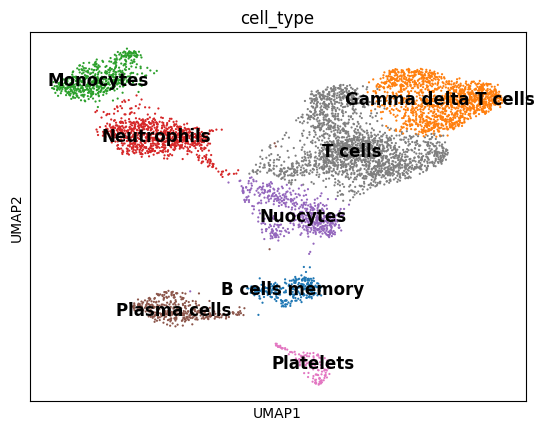

In [42]:
sc.pl.umap(
    adata,
    color=["cell_type"],
    wspace=0.5,
    size=10,
    ncols=1,
    legend_loc="on data",
    legend_fontsize=12,
    save='_cell_type_clustering.svg'    
)

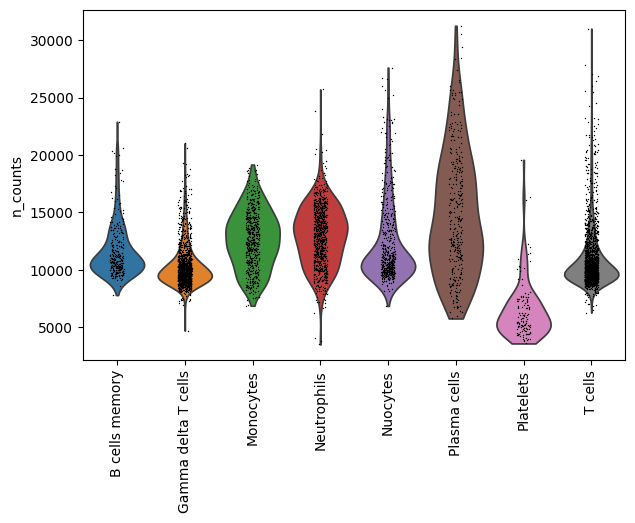

In [43]:
sc.pl.violin(
    adata,
    keys = ['n_counts'],
    groupby = 'cell_type',
    rotation = 90
)

In [44]:
adata.obs.columns

Index(['disease stage', 'treatment', 'timepoint', 'Dataset', 'sample',
       'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage',
       'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts',
       'percent_mito', 'tissue_original', 'tissue_ontology_term_id',
       'disease_ontology_term_id', 'donor_id',
       'development_stage_ontology_term_id', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id',
       'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease',
       'sex', 'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_MT',
       'log1p_total_counts_MT', 'pct_counts_MT', 't

In [45]:
available_genes = set(adata.var_names)

b_cell_memory = markers[markers['source'].isin(['B cells memory'])]['target']
b_cell_memory = b_cell_memory[b_cell_memory.isin(available_genes)]

gamma_delta_t_cells = markers[markers['source'].isin(['Gamma delta T cells'])]['target']
gamma_delta_t_cells = gamma_delta_t_cells[gamma_delta_t_cells.isin(available_genes)]

monocytes = markers[markers['source'].isin(['Monocytes'])]['target']
monocytes = monocytes[monocytes.isin(available_genes)]

neutrophils = markers[markers['source'].isin(['Neutrophils'])]['target']
neutrophils = neutrophils[neutrophils.isin(available_genes)]

nuocytes = markers[markers['source'].isin(['Nuocytes'])]['target']
nuocytes = nuocytes[nuocytes.isin(available_genes)]

plasma_cells = markers[markers['source'].isin(['Plasma cells'])]['target']
plasma_cells = plasma_cells[plasma_cells.isin(available_genes)]

platelets = markers[markers['source'].isin(['Platletes'])]['target']
platelets = platelets[platelets.isin(available_genes)]

t_cells = markers[markers['source'].isin(['T cells'])]['target']
t_cells = t_cells[t_cells.isin(available_genes)]

In [46]:
marker_genes_dict = {
    'B cells memory': b_cell_memory.head().tolist(),
    'Gamma delta T cells': gamma_delta_t_cells.head().tolist(),
    'Monocytes': monocytes.head().tolist(),
    'Neutrophils': neutrophils.head().tolist(),
    'Nuocytes': nuocytes.head().tolist(),
    'Plasma cells': plasma_cells.head().tolist(),
    'Platelets': platelets.head().tolist(),
    'T cells': t_cells.head().tolist()    
}

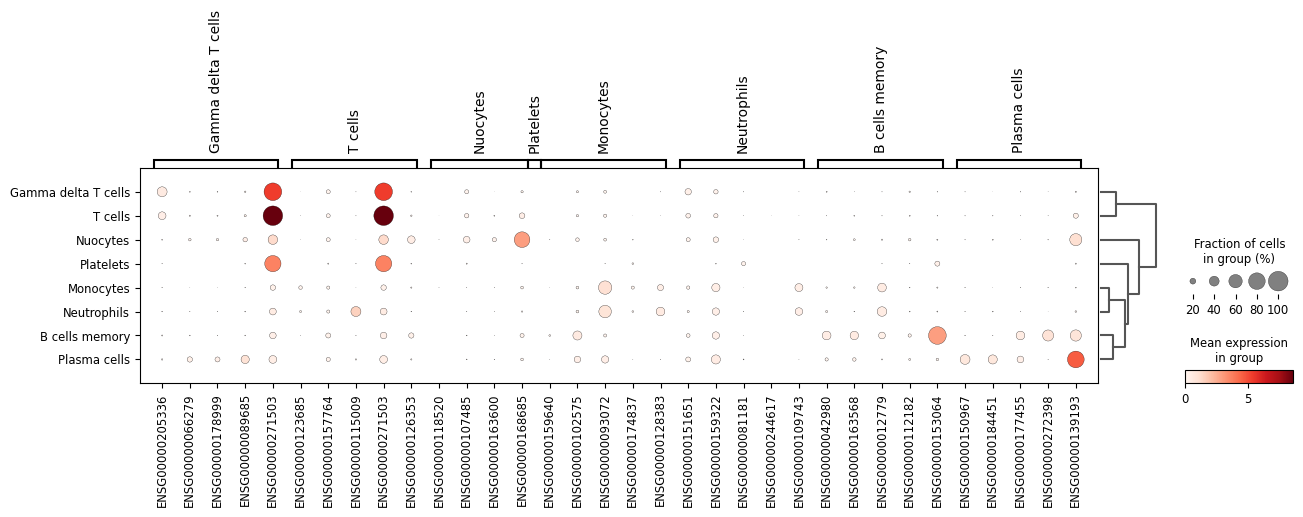

In [47]:
sc.pl.dotplot(adata, marker_genes_dict, groupby="cell_type", dendrogram=True)

categories: 0, 1, 2, etc.
var_group_labels: B cells memory, Gamma delta T cells, Monocytes, etc.


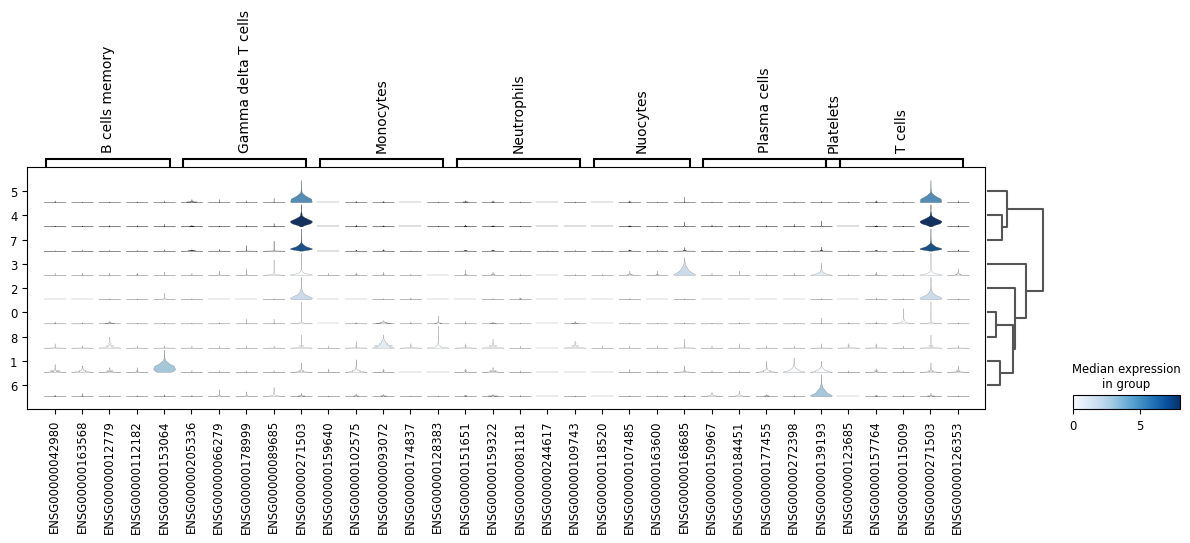

In [48]:
sc.pl.stacked_violin(
    adata, 
    marker_genes_dict, 
    groupby="leiden_res0_5",  
    dendrogram=True,
    save='_leidenRes0.5.png'
)

categories: 0, 1, 2, etc.
var_group_labels: B cells memory, Gamma delta T cells, Monocytes, etc.


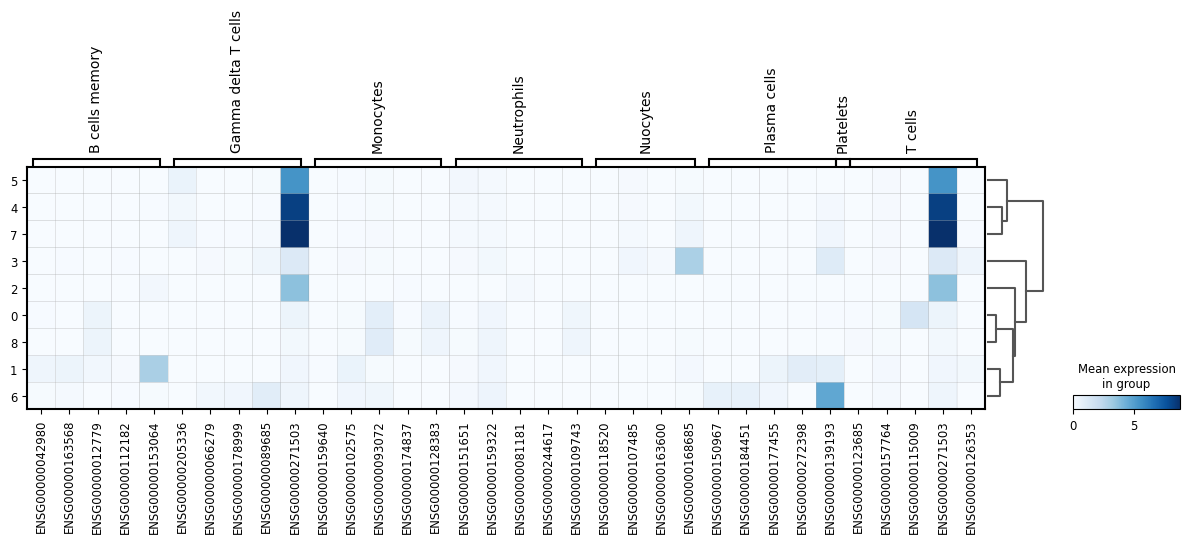

In [49]:
sc.pl.matrixplot(
    adata,
    marker_genes_dict,
    "leiden_res0_5",
    dendrogram=True,
    cmap="Blues",
)

categories: 0, 1, 2, etc.
var_group_labels: B cells memory, Gamma delta T cells, Monocytes, etc.


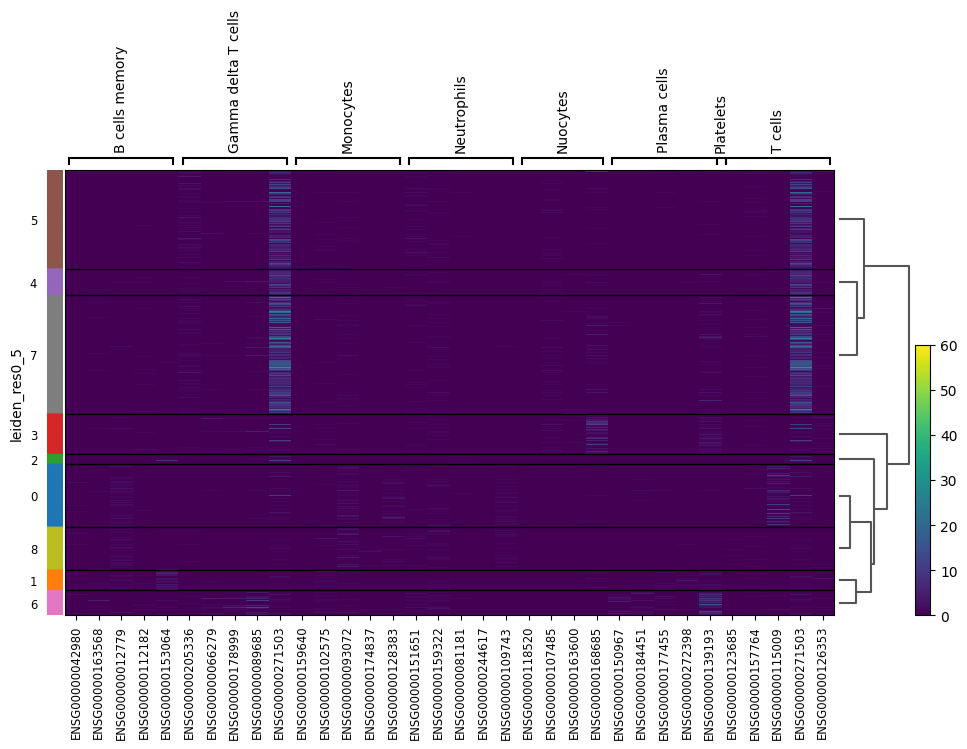

In [50]:
sc.pl.heatmap(
    adata, marker_genes_dict, groupby="leiden_res0_5", cmap="viridis", dendrogram=True
)

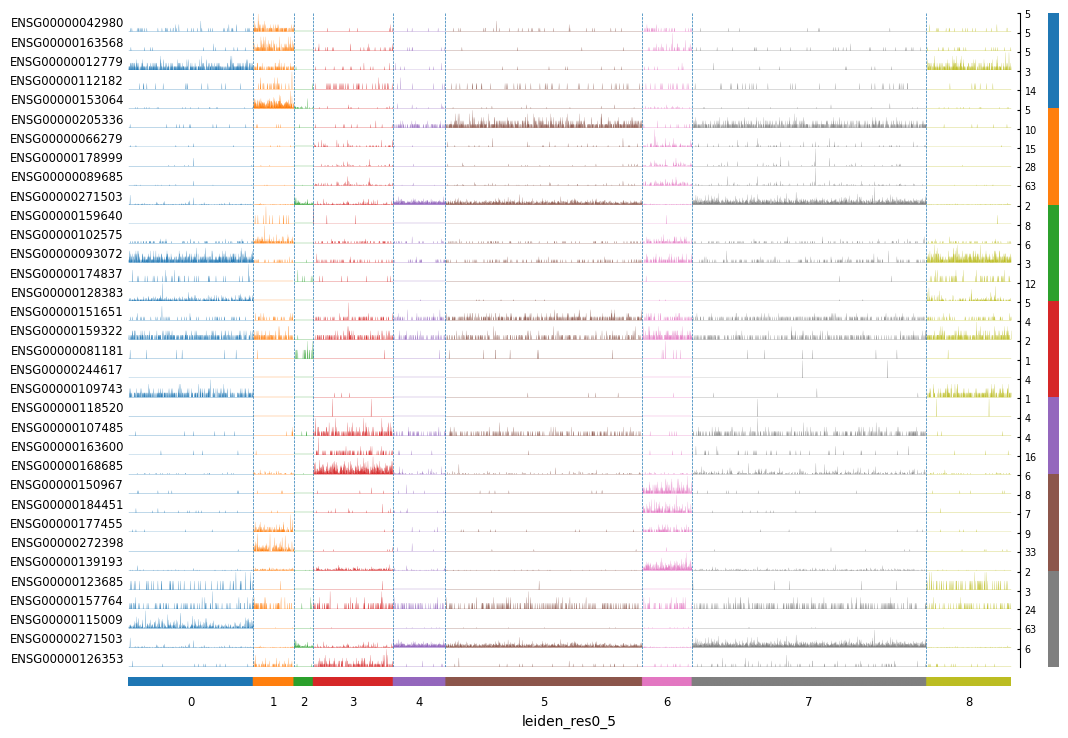

In [51]:
sc.pl.tracksplot(adata, marker_genes_dict, groupby="leiden_res0_5", dendrogram=False)